<center>
<img src="images/logo.png" alt="drawing" width="200"/>
</center>

## What is ``rubrix``?

``rubrix`` is an image search engine, which 
1. retrieves images that best describe the user-input search query
2. retrieves images most similar to the user-uploaded image

<center>
<img src="images/kicked_a_ball.png" alt="drawing" width="1000"/>
</center>

## How does Google Image Search work?

Google Images looks at the following information to retrieve images:
1. filenames for the images in the webpages that embed them
2. contextual information based on text on the same page as an image

## How does ``rubrix`` work?

For text based image retrieval, ``rubrix``uses a combined similarity search based on multiple criteria such as objects within an image, text captions for an image, etc. to retrieve relevant images.

For reverse image search, ``rubrix`` generates captions for the user-uploaded image so as to enable the combined similarity search described above.

## What do I need to know to build ``rubrix``? 

``rubrix`` uses various concepts from the branches of Artificial Intelligence such as Computer Vision and Natural Language Processing. The following infographic is a mind map which is useful to understand how each of these concepts are tied together.

<center>
<img src="images/infograph_v4.png" alt="drawing" width="600"/>
</center>

## Watch ``rubrix`` in action.. 

In [1]:
import PIL
import os
import warnings

# Hide warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.filterwarnings('ignore')

from IPython.display import display, Image

import tensorflow as tf
import tensorflow_hub as hub

from rubrix.query import query_by_text, query_by_image
from rubrix.search.encodings import MODULE_URL


# Model query arguments
model = hub.load(MODULE_URL)

### Image search - enter text query

In [9]:
%%time
search_query = "running on a beach"

# Use query_by_text method for image retrieval by text.
results = query_by_text(search_query, model, save=True)

CPU times: user 3.25 s, sys: 258 ms, total: 3.51 s
Wall time: 3.4 s


### Display results

Result 1:


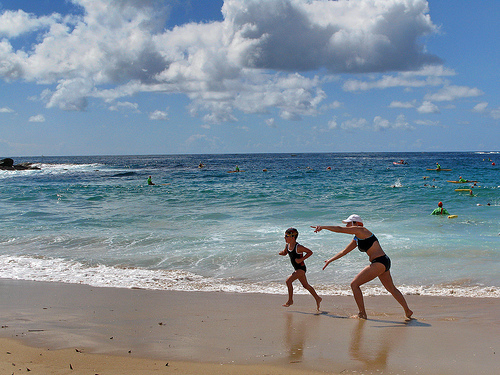

Result 2:


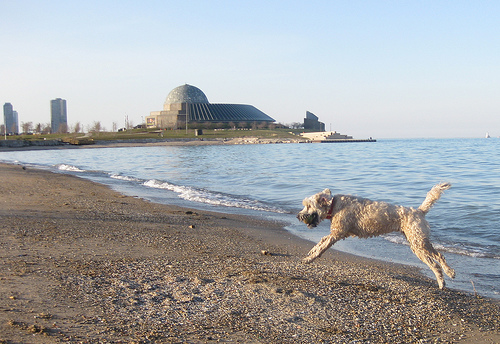

Result 3:


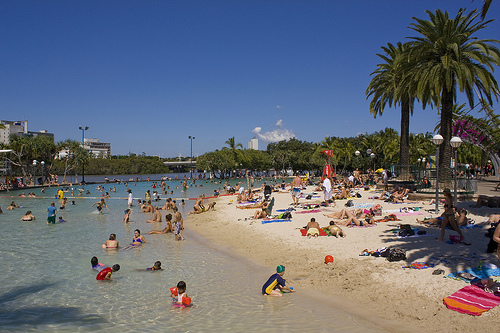

Result 4:


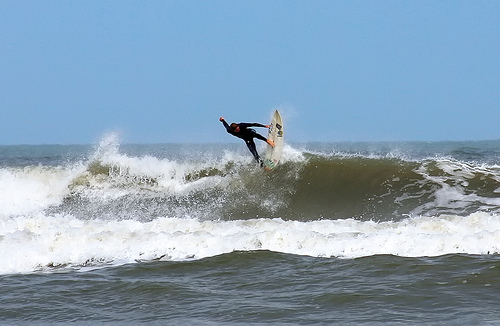

Result 5:


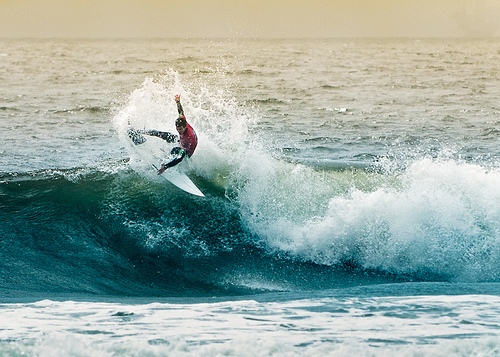

In [10]:
images = [PIL.Image.open(str(path)) for path in results]

for idx, im in enumerate(images):
    print(f'Result {idx + 1}:')
    display(Image(filename=im.filename, retina=True))

## FAQ

1. **Does ``rubrix`` use an image database?**
   <br>*Yes, it uses the Flickr8k image database, which is a collection of 8000 day-to-day images from Flickr.*


2. **Does ``rubrix`` look through the entire image database to retrieve relevant images?**
   <br>*NO! A smart filtering technique was designed which generates an inverse image index mapping the images in the database to hand-crafted features.*